In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [3]:
import sys
print(sys.executable)

C:\Users\HP\AppData\Local\Programs\Python\Python311\python.exe


In [4]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [5]:
import sys
print(sys.version)

import tensorflow as tf
print(tf.__version__)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
2.20.0


In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [8]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Flattened train shape:", X_train_flat.shape)

Flattened train shape: (60000, 784)


In [9]:
X_train_flat, X_val_flat, y_train, y_val = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42
)

print("Train size:", X_train_flat.shape)
print("Validation size:", X_val_flat.shape)

Train size: (48000, 784)
Validation size: (12000, 784)


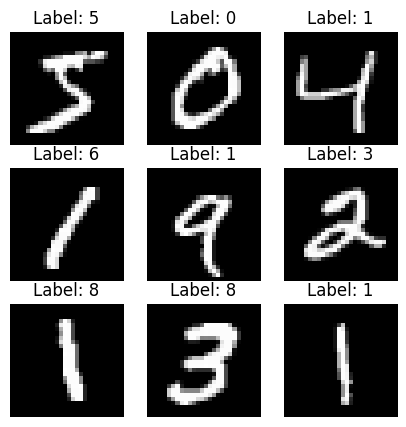

In [10]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

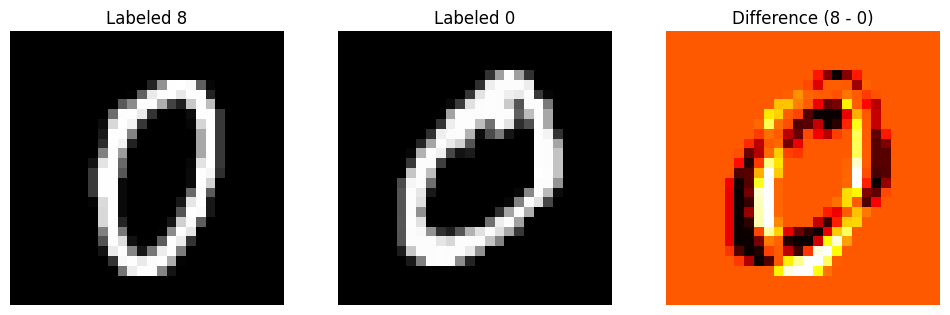

In [18]:
import matplotlib.pyplot as plt
import numpy as np

img8 = X_train[1000]      # labeled 8
idx0 = np.where(y_train == 0)[0][0]
img0 = X_train[idx0]

diff = img8 - img0

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Labeled 8")
plt.imshow(img8, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Labeled 0")
plt.imshow(img0, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Difference (8 - 0)")
plt.imshow(diff, cmap='hot')
plt.axis('off')

plt.show()

In [20]:
#Model training

In [23]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
# Normalize
X_train_norm = X_train / 255.0
X_test_norm  = X_test / 255.0

# Flatten 28x28 → 784
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat  = X_test_norm.reshape(X_test_norm.shape[0], -1)

print(X_train_flat.shape, X_test_flat.shape)

(60000, 784) (10000, 784)


In [26]:
# Normalize
X_train_norm = X_train / 255.0
X_test_norm  = X_test / 255.0

# Flatten
X_train_flat = X_train_norm.reshape(60000, -1)
X_test_flat  = X_test_norm.reshape(10000, -1)

print(X_train_flat.shape, y_train.shape)

(60000, 784) (60000,)


In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

log_reg.fit(X_train_flat, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
from sklearn.metrics import accuracy_score

y_pred_lr = log_reg.predict(X_test_flat)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9264


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Predict using Logistic Regression
y_pred_lr = log_reg.predict(X_test_flat)

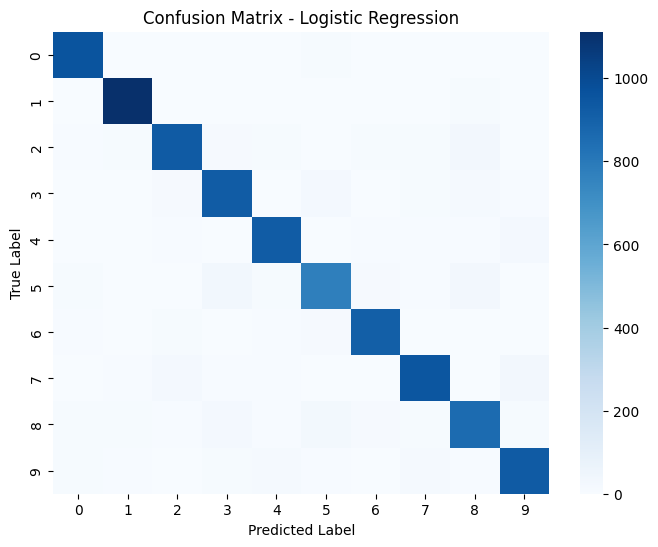

In [39]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_lr,
    cmap="Blues",
    annot=False
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
# Normalize
X_train_cnn = X_train / 255.0
X_test_cnn  = X_test / 255.0

# Add channel dimension
X_train_cnn = X_train_cnn.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test_cnn.reshape(-1, 28, 28, 1)

print(X_train_cnn.shape, X_test_cnn.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [32]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = cnn.fit(
    X_train_cnn,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9498 - loss: 0.1644 - val_accuracy: 0.9855 - val_loss: 0.0545
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9848 - loss: 0.0489 - val_accuracy: 0.9877 - val_loss: 0.0409
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9917 - val_loss: 0.0318
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9908 - val_loss: 0.0326


In [34]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9898 - loss: 0.0323
CNN Test Accuracy: 0.989799976348877


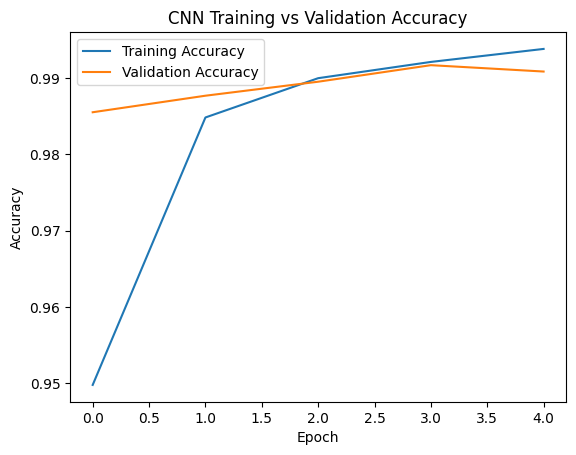

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


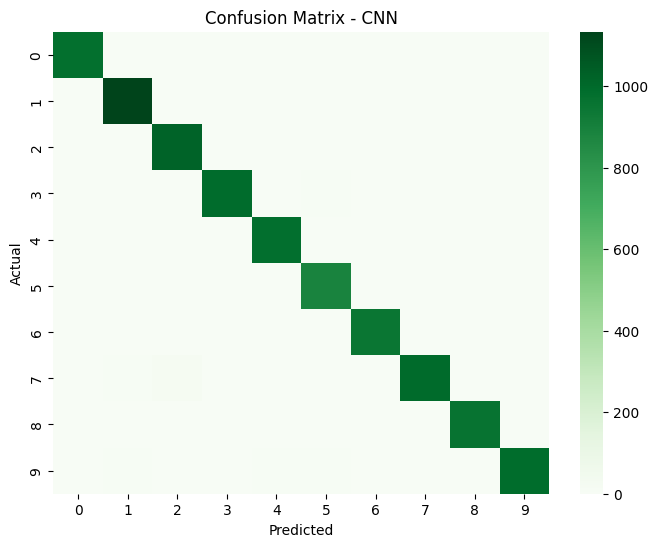

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CNN predictions
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, cmap="Greens")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
#2nd

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

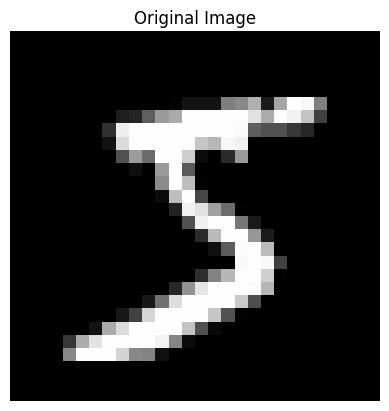

In [42]:
# Use one MNIST image
img = X_train[0]  # shape: (28, 28)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

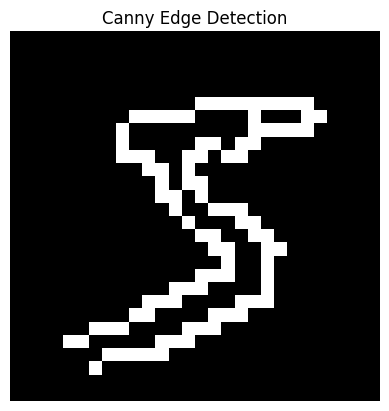

In [43]:
edges = cv2.Canny(img.astype(np.uint8), threshold1=100, threshold2=200)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

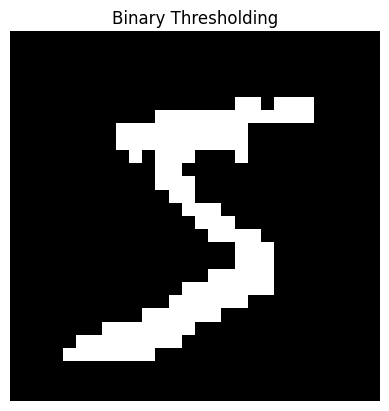

In [44]:
_, thresh = cv2.threshold(
    img.astype(np.uint8),
    127,
    255,
    cv2.THRESH_BINARY
)

plt.imshow(thresh, cmap='gray')
plt.title("Binary Thresholding")
plt.axis('off')
plt.show()

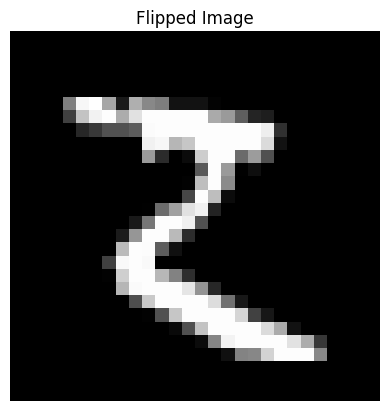

In [45]:
flip = cv2.flip(img, 1)

plt.imshow(flip, cmap='gray')
plt.title("Flipped Image")
plt.axis('off')
plt.show()

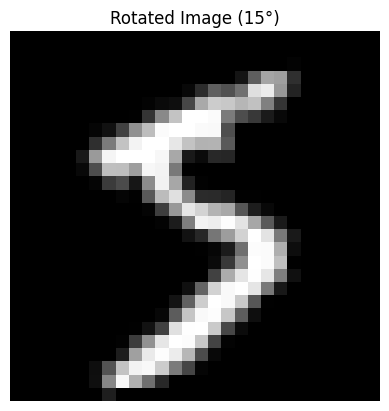

In [46]:
(h, w) = img.shape
center = (w // 2, h // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, angle=15, scale=1.0)
rotated = cv2.warpAffine(img, rotation_matrix, (w, h))

plt.imshow(rotated, cmap='gray')
plt.title("Rotated Image (15°)")
plt.axis('off')
plt.show()

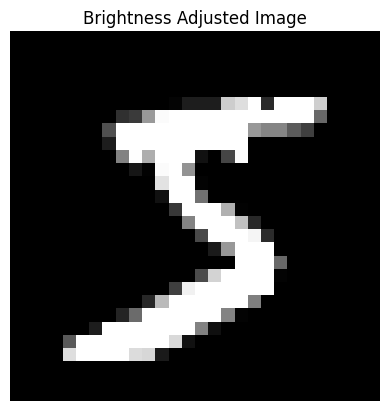

In [47]:
bright = cv2.convertScaleAbs(img, alpha=1.5, beta=20)

plt.imshow(bright, cmap='gray')
plt.title("Brightness Adjusted Image")
plt.axis('off')
plt.show()

In [48]:
cnn.save("cnn_model.h5")